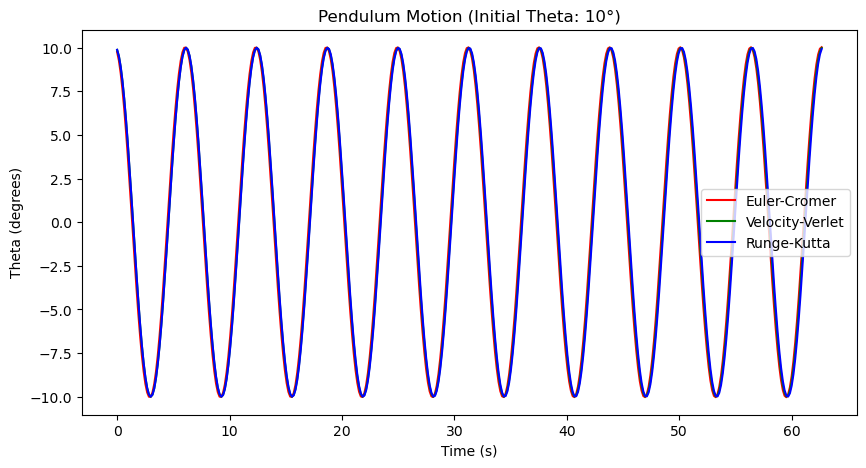

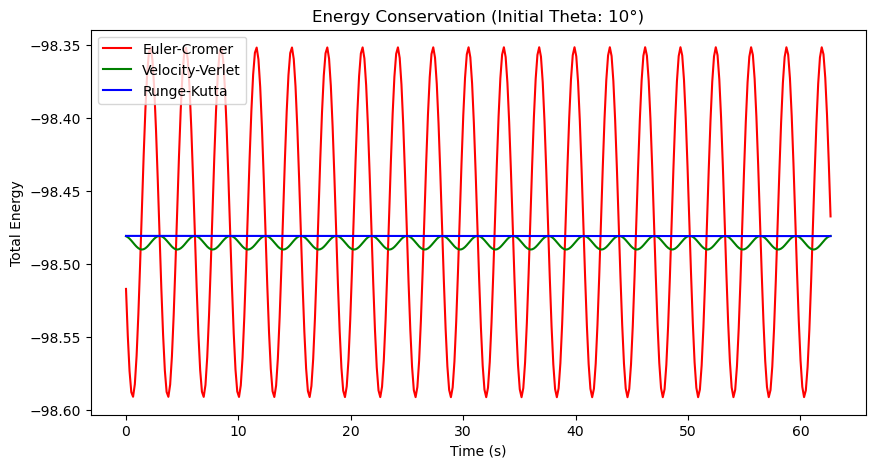

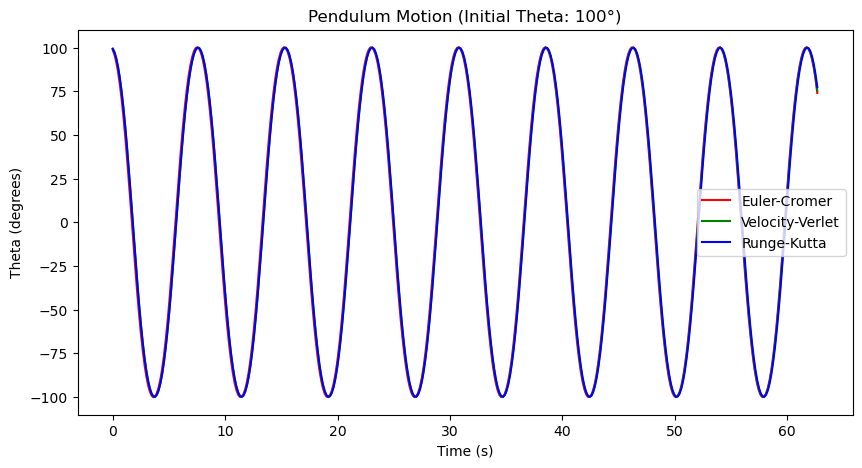

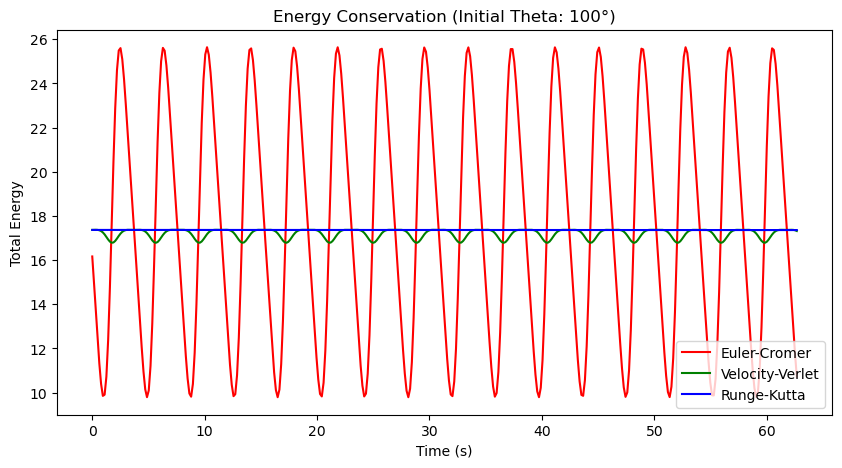

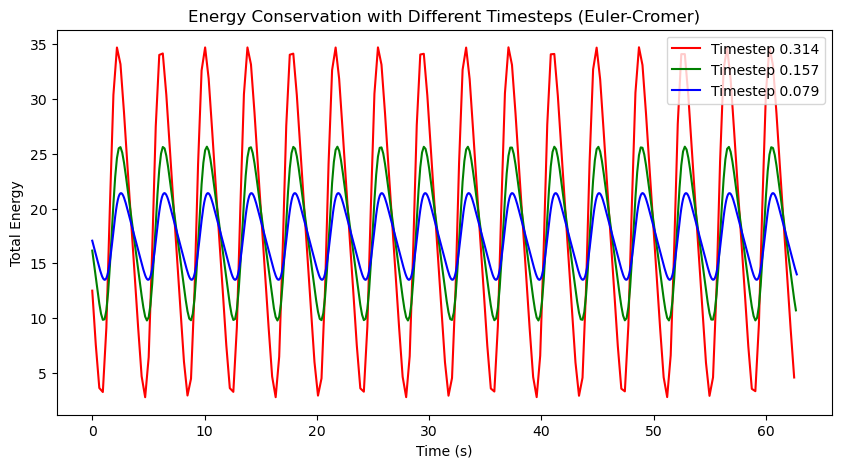

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Constants
L = 10  # Length 
g = 10  # Gravity 

# Acceleration equation
def acceleration(theta):
    return - (g / L) * np.sin(theta)

# Euler-Cromer -- roughest estimate
def euler_cromer(theta0, omega0, tau, t_max):
    t_values = np.arange(0, t_max, tau)
    theta, omega = theta0, omega0
    
    theta_values = [] 
    energy_values = []
    
    for t in t_values:
        omega += acceleration(theta) * tau
        theta += omega * tau
        energy = 0.5 * L**2 * omega**2 - g * L * np.cos(theta)
        theta_values.append(theta)
        energy_values.append(energy)
    
    return t_values, np.array(theta_values), np.array(energy_values)

# Velocity-Verlet -- I watched a few videos on this method so unsure if it is exactly correct
def velocity_verlet(theta0, omega0, tau, t_max):
    t_values = np.arange(0, t_max, tau)
    theta, omega = theta0, omega0
    theta_values, energy_values = [], []
    
    for t in t_values:
        omega_half = omega + 0.5 * acceleration(theta) * tau
        theta += omega_half * tau
        omega = omega_half + 0.5 * acceleration(theta) * tau
        energy = 0.5 * L**2 * omega**2 - g * L * np.cos(theta)
        theta_values.append(theta)
        energy_values.append(energy)
    
    return t_values, np.array(theta_values), np.array(energy_values)

# RK4 -- Should be the most accurate beacsue of the four estimates 
def runge_kutta(theta0, omega0, tau, t_max):
    t_values = np.arange(0, t_max, tau)
    theta, omega = theta0, omega0
    theta_values, energy_values = [], []
    
    for t in t_values:
        k1_omega = acceleration(theta)
        k1_theta = omega
        
        k2_omega = acceleration(theta + 0.5 * tau * k1_theta)
        k2_theta = omega + 0.5 * tau * k1_omega
        
        k3_omega = acceleration(theta + 0.5 * tau * k2_theta)
        k3_theta = omega + 0.5 * tau * k2_omega
        
        k4_omega = acceleration(theta + tau * k3_theta)
        k4_theta = omega + tau * k3_omega
        
        theta += tau * (k1_theta + 2*k2_theta + 2*k3_theta + k4_theta) / 6
        omega += tau * (k1_omega + 2*k2_omega + 2*k3_omega + k4_omega) / 6
        
        energy = 0.5 * L**2 * omega**2 - g * L * np.cos(theta)
        theta_values.append(theta)
        energy_values.append(energy)
    
    return t_values, np.array(theta_values), np.array(energy_values)

# Simulation parameters
angles = [np.radians(10), np.radians(100)]  # Convert degrees to radians
omega0 = 0  # Initial omega
tau_values = [2*np.pi/20, 2*np.pi/40, 2*np.pi/80]  # Different timesteps
t_max = 10 * (2 * np.pi * np.sqrt(L / g))  # 10 periods

# Run simulations and plot 
methods = {'Euler-Cromer': euler_cromer, 'Velocity-Verlet': velocity_verlet, 'Runge-Kutta': runge_kutta}
colors = ['r', 'g', 'b']

for theta0 in angles:
    plt.figure(figsize=(10, 5))
    for (label, method), color in zip(methods.items(), colors):
        t_vals, theta_vals, energy_vals = method(theta0, omega0, tau_values[1], t_max)
        plt.plot(t_vals, np.degrees(theta_vals), label=label, color=color)
    plt.xlabel('Time (s)')
    plt.ylabel('Theta (degrees)')
    plt.title(f'Pendulum Motion (Initial Theta: {np.degrees(theta0):.0f}°)')
    plt.legend()
    plt.show()
    
    plt.figure(figsize=(10, 5))
    for (label, method), color in zip(methods.items(), colors):
        t_vals, theta_vals, energy_vals = method(theta0, omega0, tau_values[1], t_max)
        plt.plot(t_vals, energy_vals, label=label, color=color)
    plt.xlabel('Time (s)')
    plt.ylabel('Total Energy')
    plt.title(f'Energy Conservation (Initial Theta: {np.degrees(theta0):.0f}°)')
    plt.legend()
    plt.show()

# Convergence analysis
plt.figure(figsize=(10, 5))
for tau, color in zip(tau_values, colors):
    t_vals, _, energy_vals = euler_cromer(np.radians(100), omega0, tau, t_max)
    plt.plot(t_vals, energy_vals, label=f'Timestep {tau:.3f}', color=color)
plt.xlabel('Time (s)')
plt.ylabel('Total Energy')
plt.title('Energy Conservation with Different Timesteps (Euler-Cromer)')
plt.legend()
plt.show()
